In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


the dataframe has got 891 rows and 12 columns. the label in the dataframe is the survived column. there are a few features which seems to be less useful like passengerId, Ticket in the first observation and the model should be predicting the survival of the person after the data is later passed into it.

In [3]:
df.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


What is very observable is the number of NaN present in the Cabin column. It would be better if we drop the column totally. What is observable is that cabin is alloted to the ones having First class and the ones having third and many of second class were not alloted a cabin. It appears very difficult to sieve the data for the ones having second class and also alloted a cabin. To solve the problem it seems to be best to drop the cabin column in total

In [4]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [5]:
#checking the shape of the dataset
df.shape

(891, 12)

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

passengerId, Survived, Pclass, age, Sibsp, Parch, Fare are all numeric data. Embarked, Cabin Name and sex are object types. In the data seen the Sex feature has only two entries male and female and so it is safe to say we can use label encoder to solve the problem. Name can be again dropped as the model will not learn anything from the name or atleast it seems so from the initial observation.

In [7]:
#Checking nulls
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The age column has many NaN rows as well. We will use mean to solve the problem of that column. Embarked has only two NaN and that can be dropped. Cabin feature can be entirely dropped as the number of NaN is too high.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.drop(['Cabin','PassengerId','Name','Ticket'],axis = 1,inplace = True)
df.shape

(891, 8)

As decided we are dropping cabin, passengerId, name, Ticket as these features are not useful for the model.

In [10]:
df['Age'].fillna(df['Age'].mean(),inplace = True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [ ]:
We are using the mean to fill the null value of age column.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


we can see only two NaN are left in the embarked feature which can be dropped entirely.

In [12]:
df.dropna(axis = 0,inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [ ]:
now the  data has no nulls

In [13]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
Survived,2
Pclass,3
Sex,2
Age,89
SibSp,7
Parch,7
Fare,247
Embarked,3


We can see the survived label has only two values which as observed earlier is int. The pclass is also numeric 1,2,3. Sex is having only two, male and female and we can use label encoder over it. Age has got many different values so it is continuous data and same is for fare as well. rest are all having categories whoich are less. embarked is also a object data having three values only

In [14]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


There seems to be some outliers in the age and fare features. But the fare feature outliers might not be treated as there are some people having multiple tickets for the first class which shows huge fare but it is for multiple people and so the fare went up. Considering that the outliers present might not be dropped as the high fare is because of multiple people in a group. outliers of age might be fixed later.

In [15]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
df1 = lab_enc.fit_transform(df['Sex'])
df['Sex'] = df1
df2 = lab_enc.fit_transform(df['Embarked'])
df['Embarked'] = df2
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


We havedealt with the categorical data.

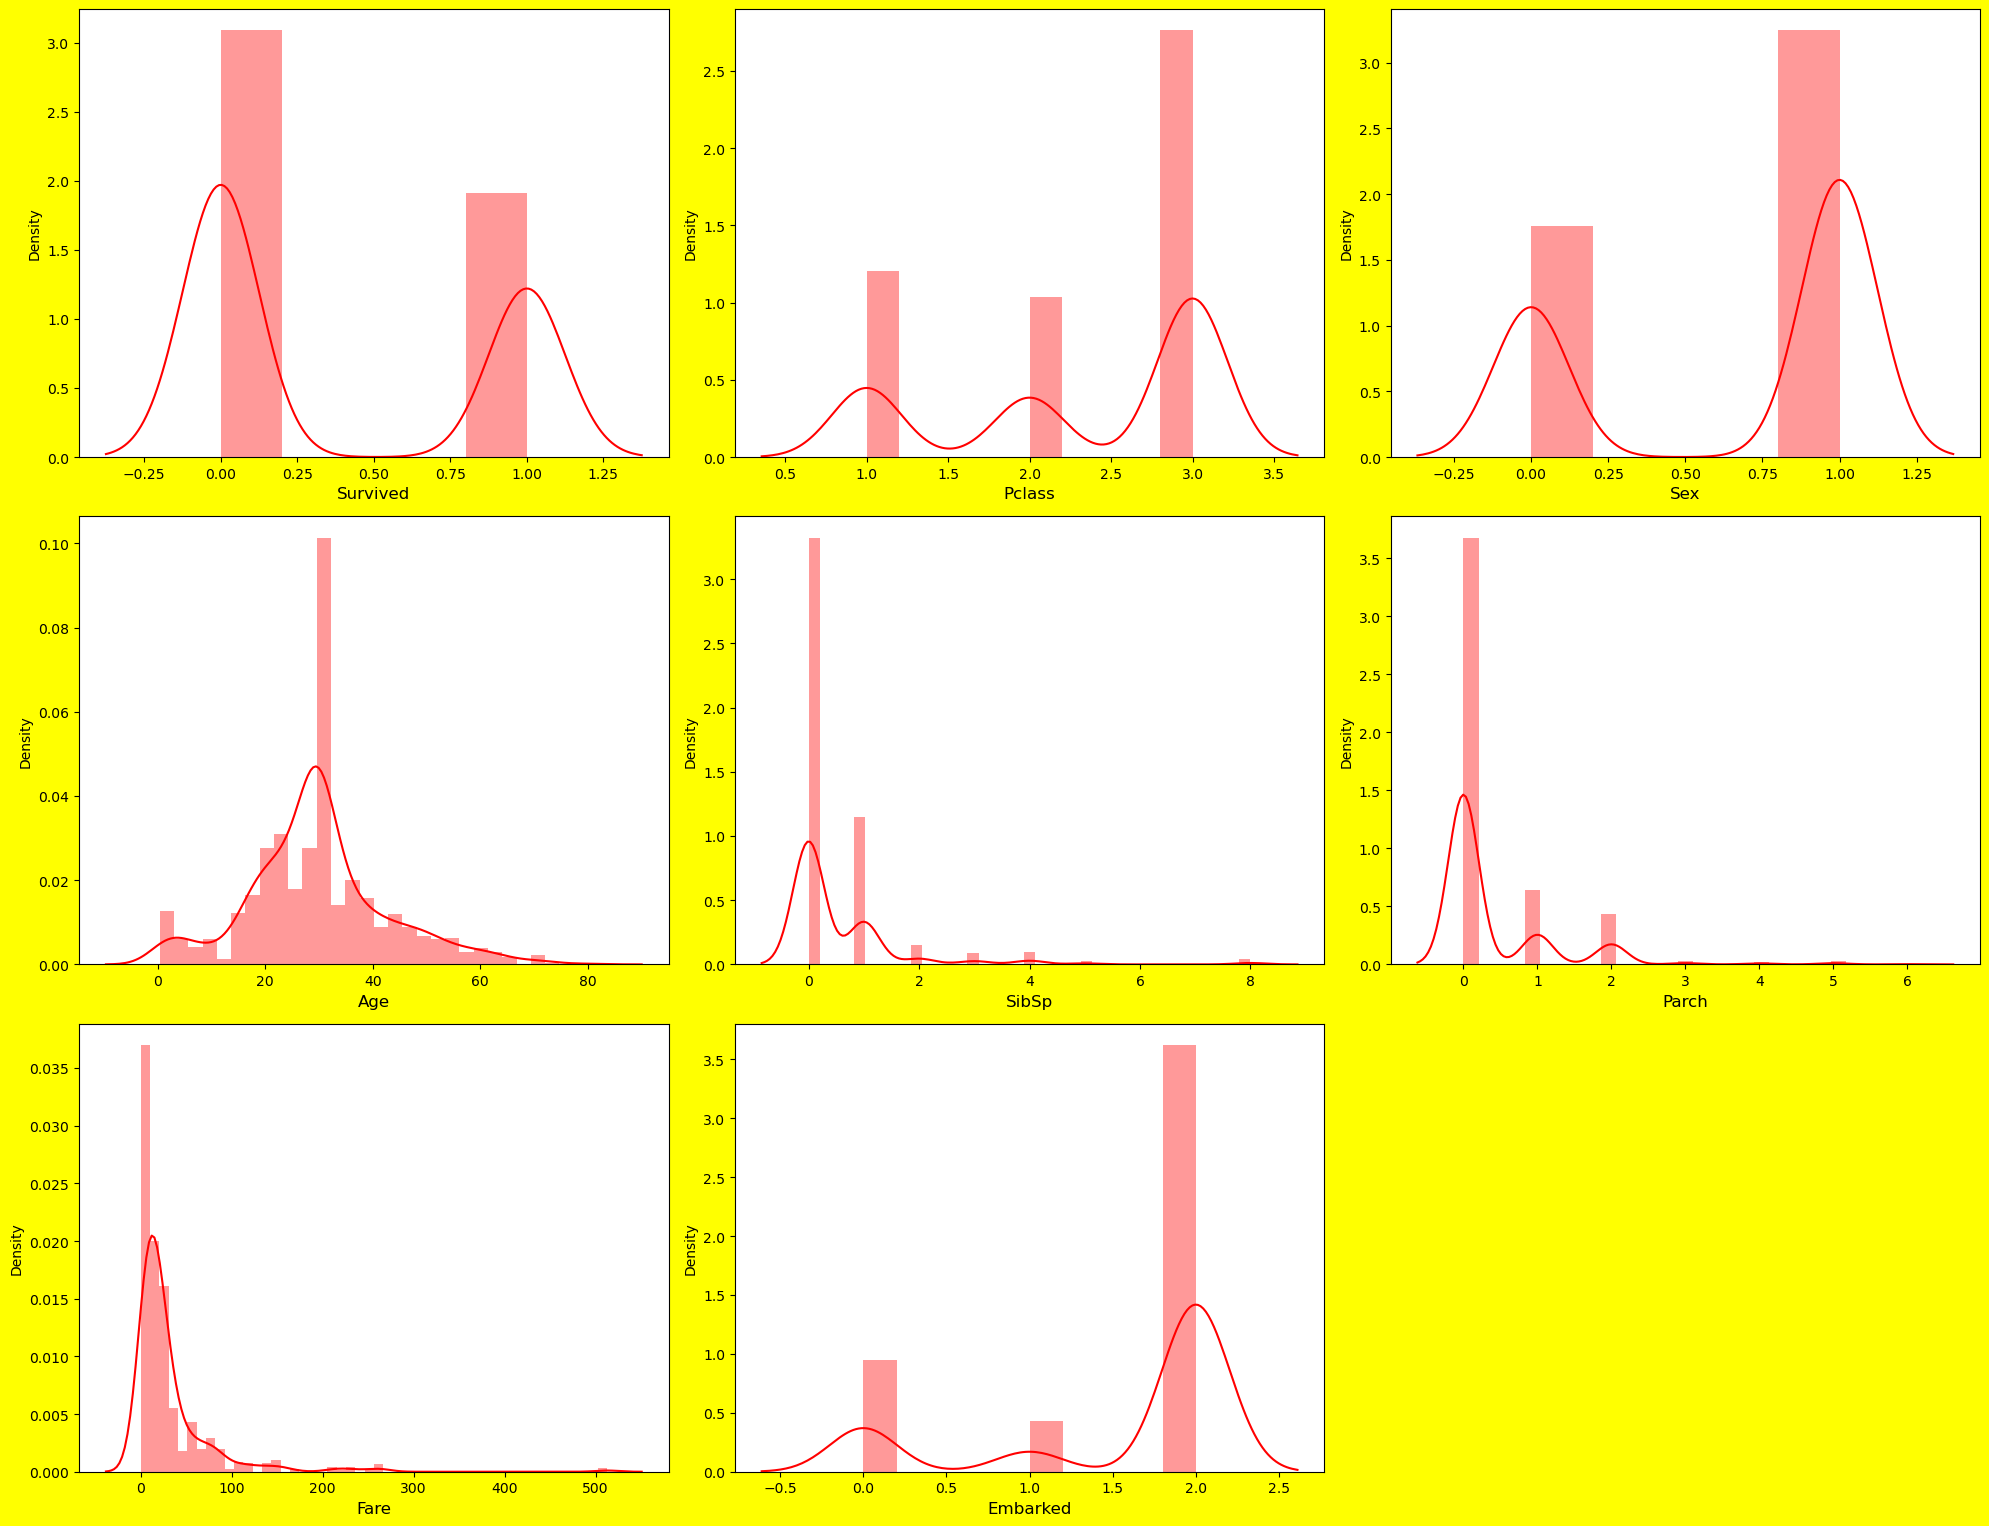

In [16]:
plt.figure(figsize=(20,20),facecolor="yellow")
plotnumber = 1
for column in df:
    if plotnumber <= 11:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],color = "r")
        plt.xlabel(column, fontsize = 12)
    plotnumber+=1
plt.tight_layout()

the number of people survived are less than the ones who did not
the number of people in the second class were the least and then comes ones in the second class and the most people who travelled were in the third class.
the males were more than the females
the age shows a good distribution and has few outliers
the ones not having siblings were more than the ones having siblings and same is for parch
The fares are dense in the smaller amount and less in the higher bracket. we can conclude the ame observation that many people travelled in the third class and fewer in others.
Many people embarked from One particular port 'S'(Southhampton) then was from 'C'(Cherbourg) and remaining from 'Q'(Queenstown)

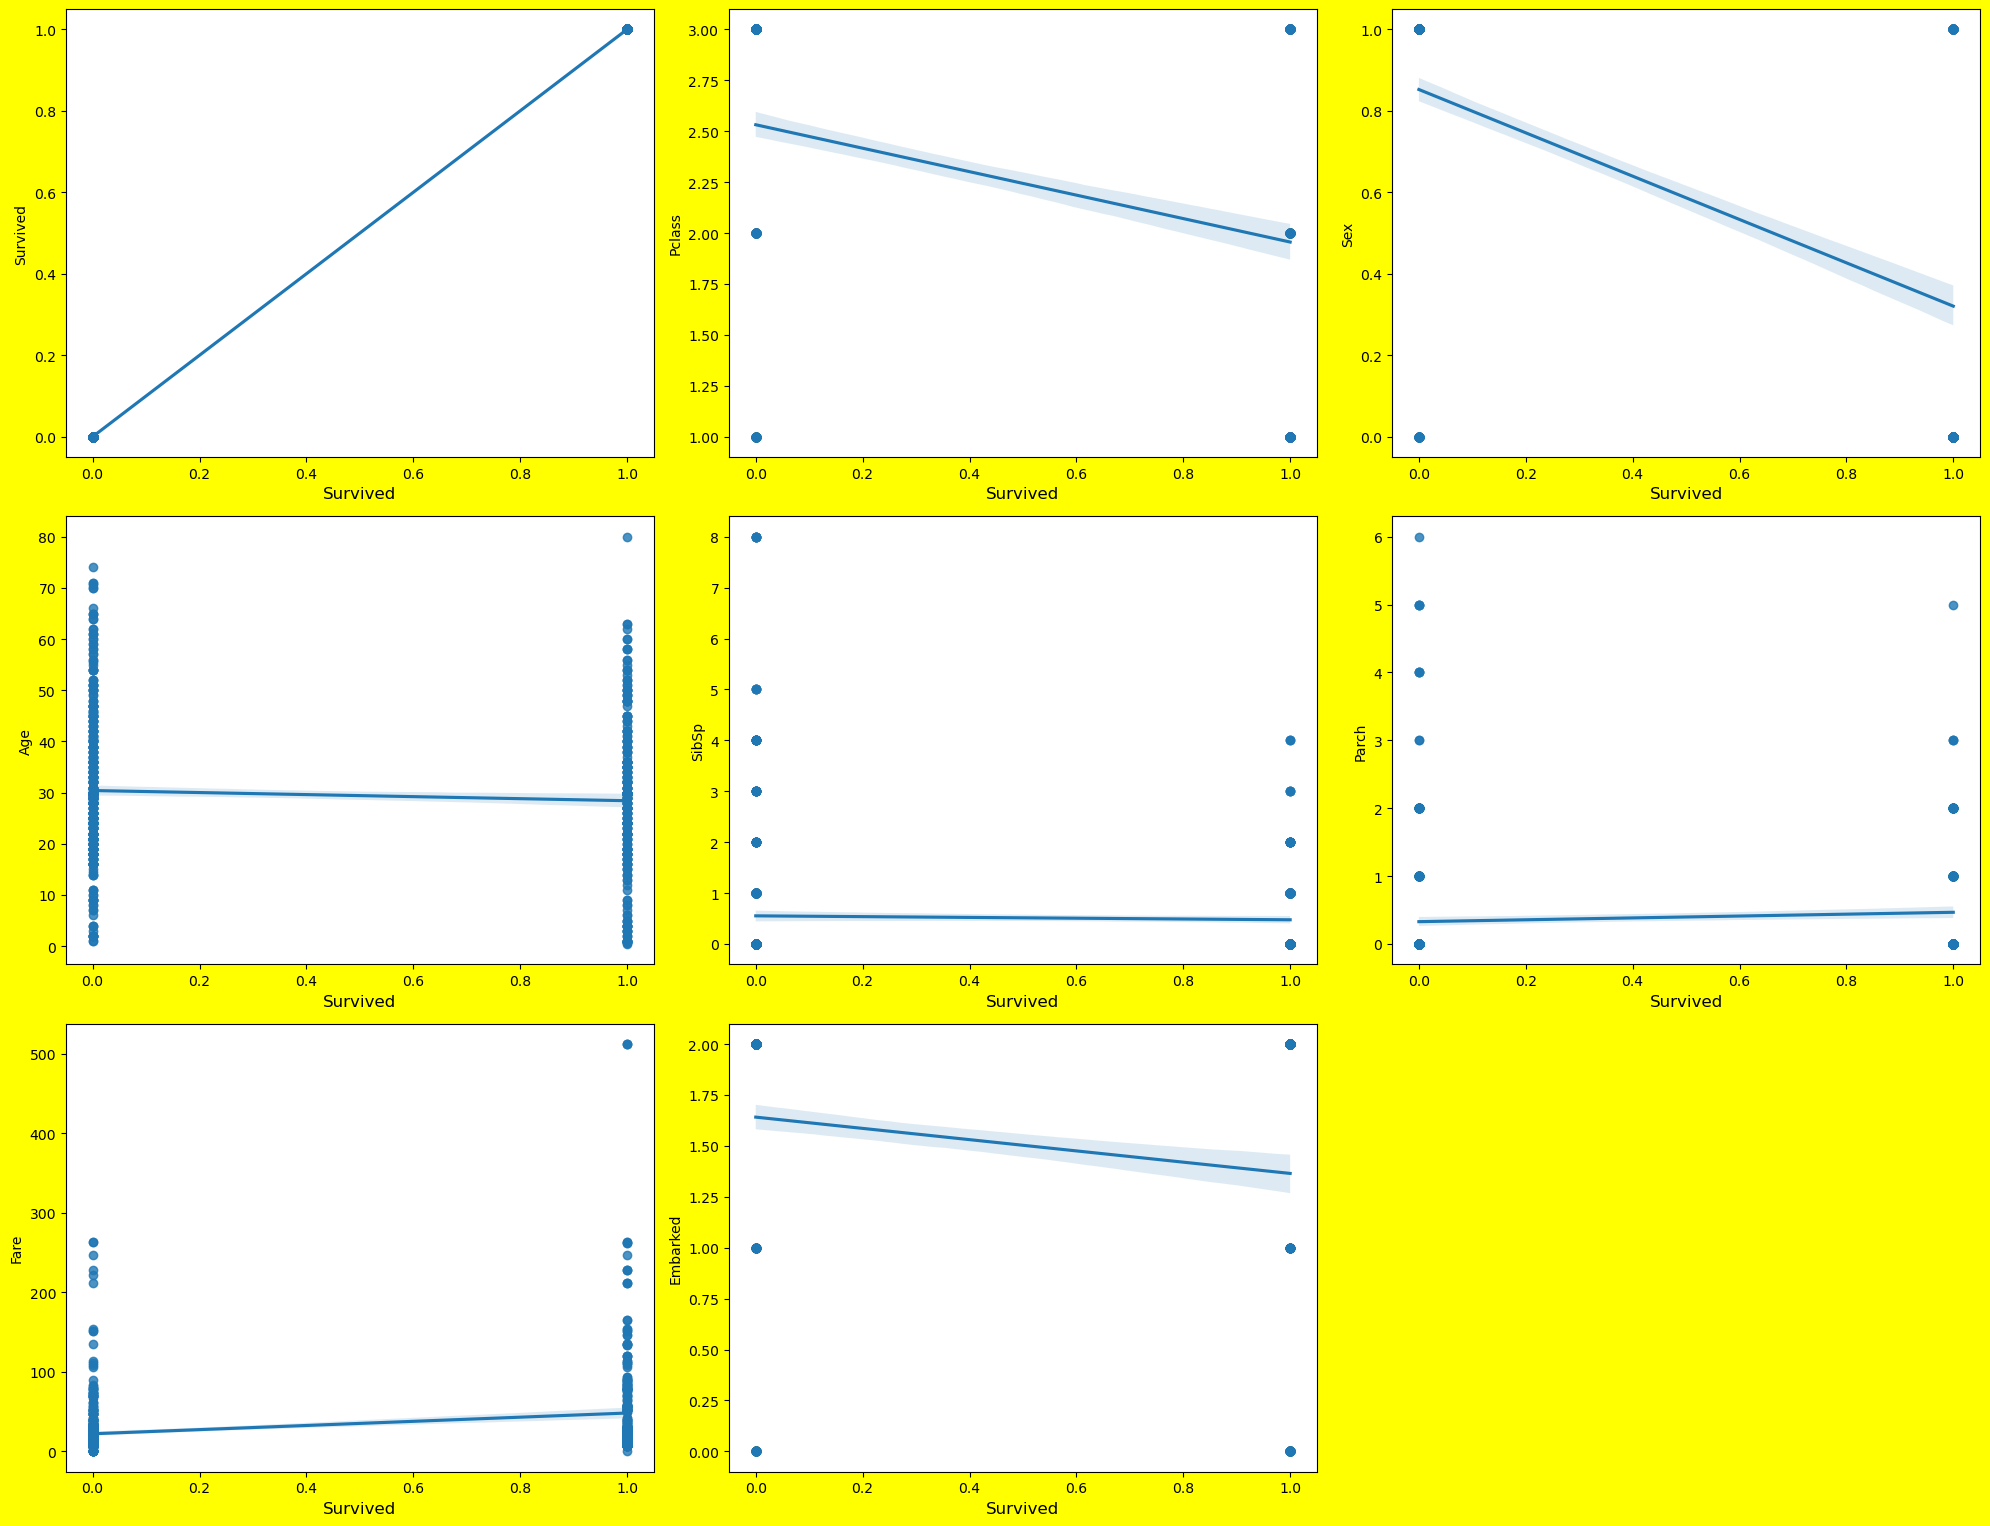

In [17]:
plt.figure(figsize=(20,20),facecolor="yellow")
plotnumber = 1
for column in df:
    if plotnumber <= 11:
        ax = plt.subplot(4,3,plotnumber)
        sns.regplot(x='Survived',y=column,data = df)
        plt.xlabel('Survived',fontsize =12)
        plt.ylabel(column)
    plotnumber+=1
plt.tight_layout()

for the pclass data we can see there is a drop in the reg line so people of one class survived more than others.
for the sex feature we can see a huge drop from one class to other which is definitely showing that people of one particular sex survived more than the other. the drop is from 0 to 1. So females survived more than the males.
People of all ages have survived quite in thensame manner. so feature seems to be left for the model to interpret.
Not much conclusive observations in Sipsb and parch
People paying fares of the same amounts have and have not survived as well. So the data might not be contributing a lot to label. but people paying very high fare has survived so that is also observable.
People who embarked from one particular port seems to have survived more.

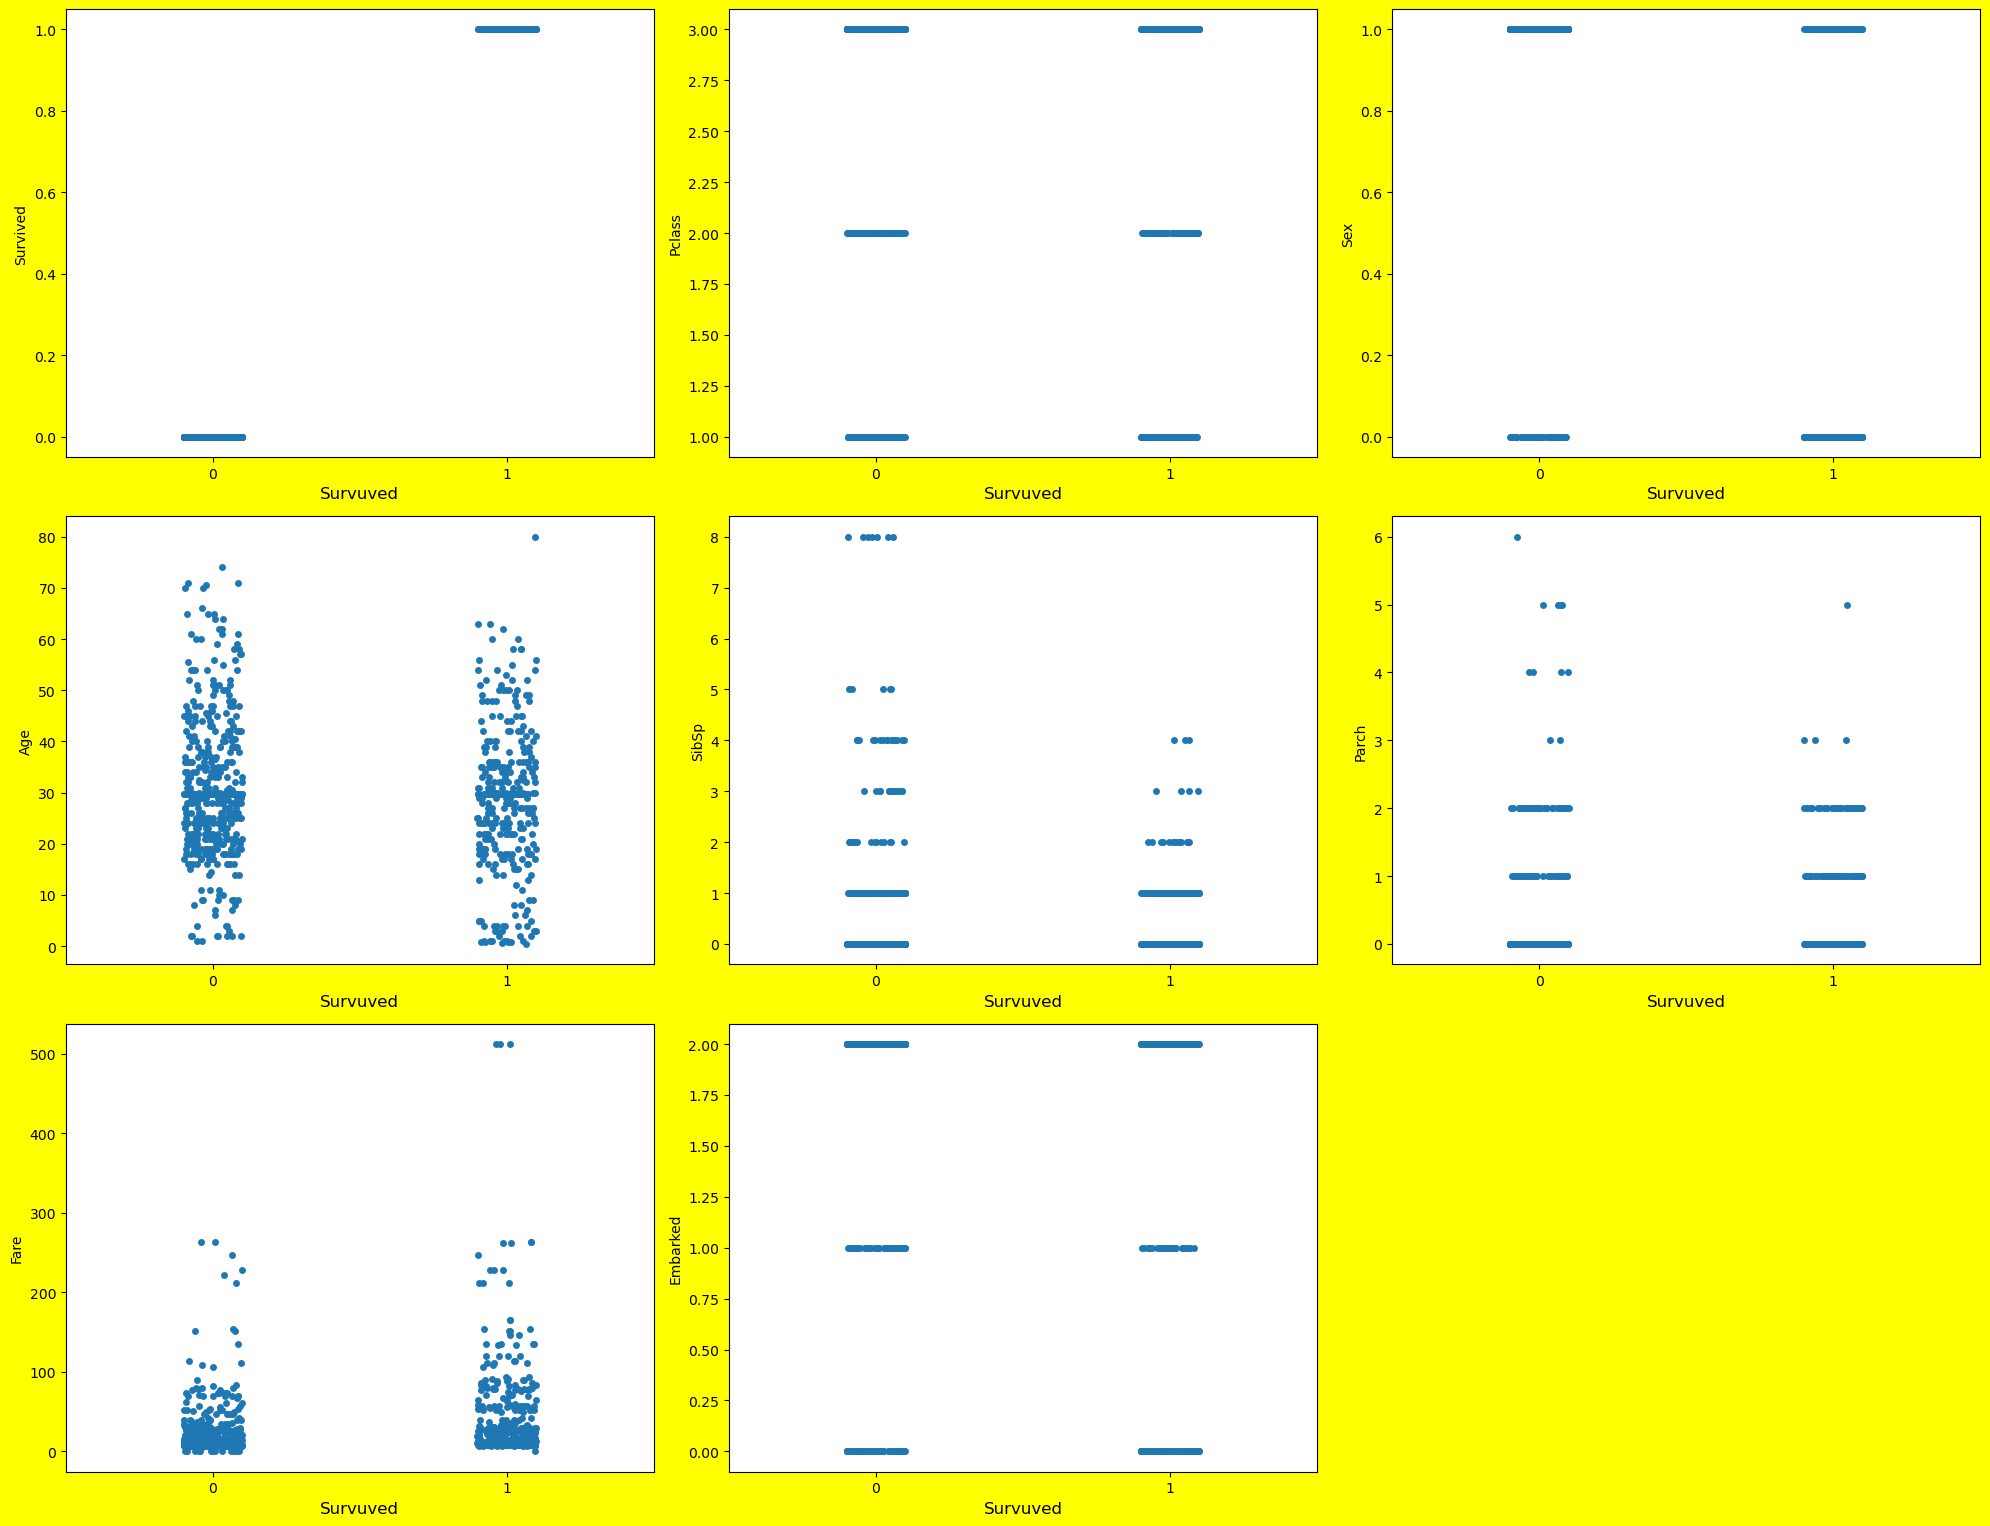

In [18]:
plt.figure(figsize=(20,20),facecolor="yellow")
plotnumber = 1
for column in df:
    if plotnumber <= 11:
        ax = plt.subplot(4,3,plotnumber)
        sns.stripplot(x='Survived',y=column,data = df)
        plt.xlabel('Survuved',fontsize =12)
        plt.ylabel(column)
    plotnumber+=1
plt.tight_layout()

The stip plot also confirms our previuos observations

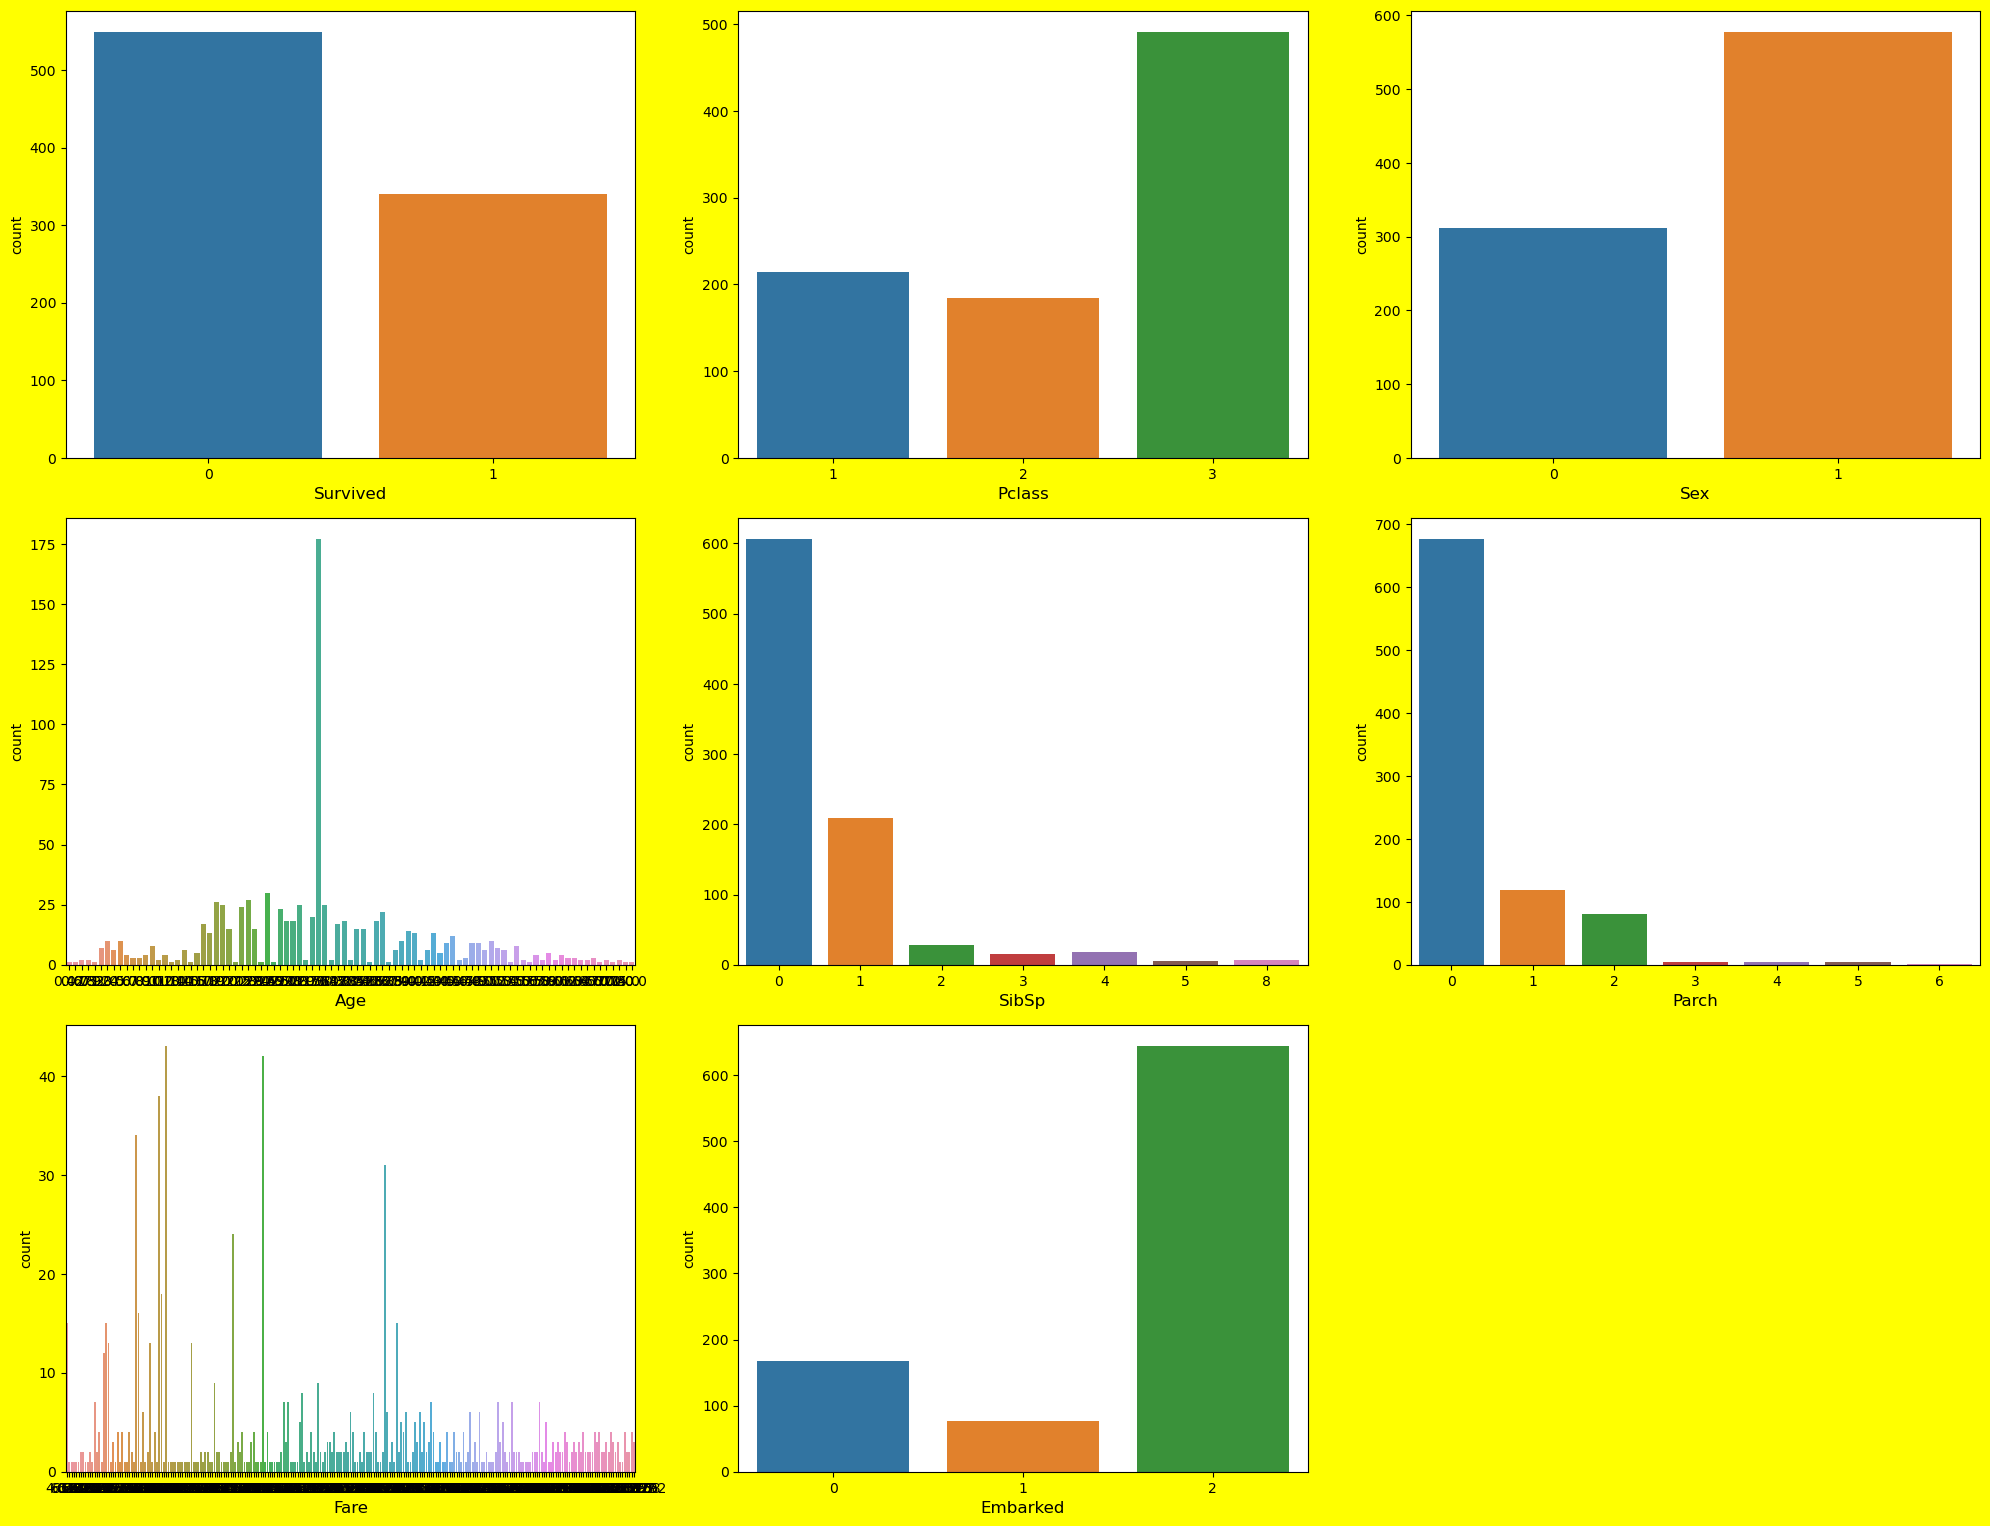

In [19]:
plt.figure(figsize=(20,20),facecolor="yellow")
plotnumber = 1
for column in df:
    if plotnumber <= 11:
        ax = plt.subplot(4,3,plotnumber)
        sns.countplot(x=column,data = df)
        plt.xlabel(column,fontsize =12)
    plotnumber+=1
plt.tight_layout()

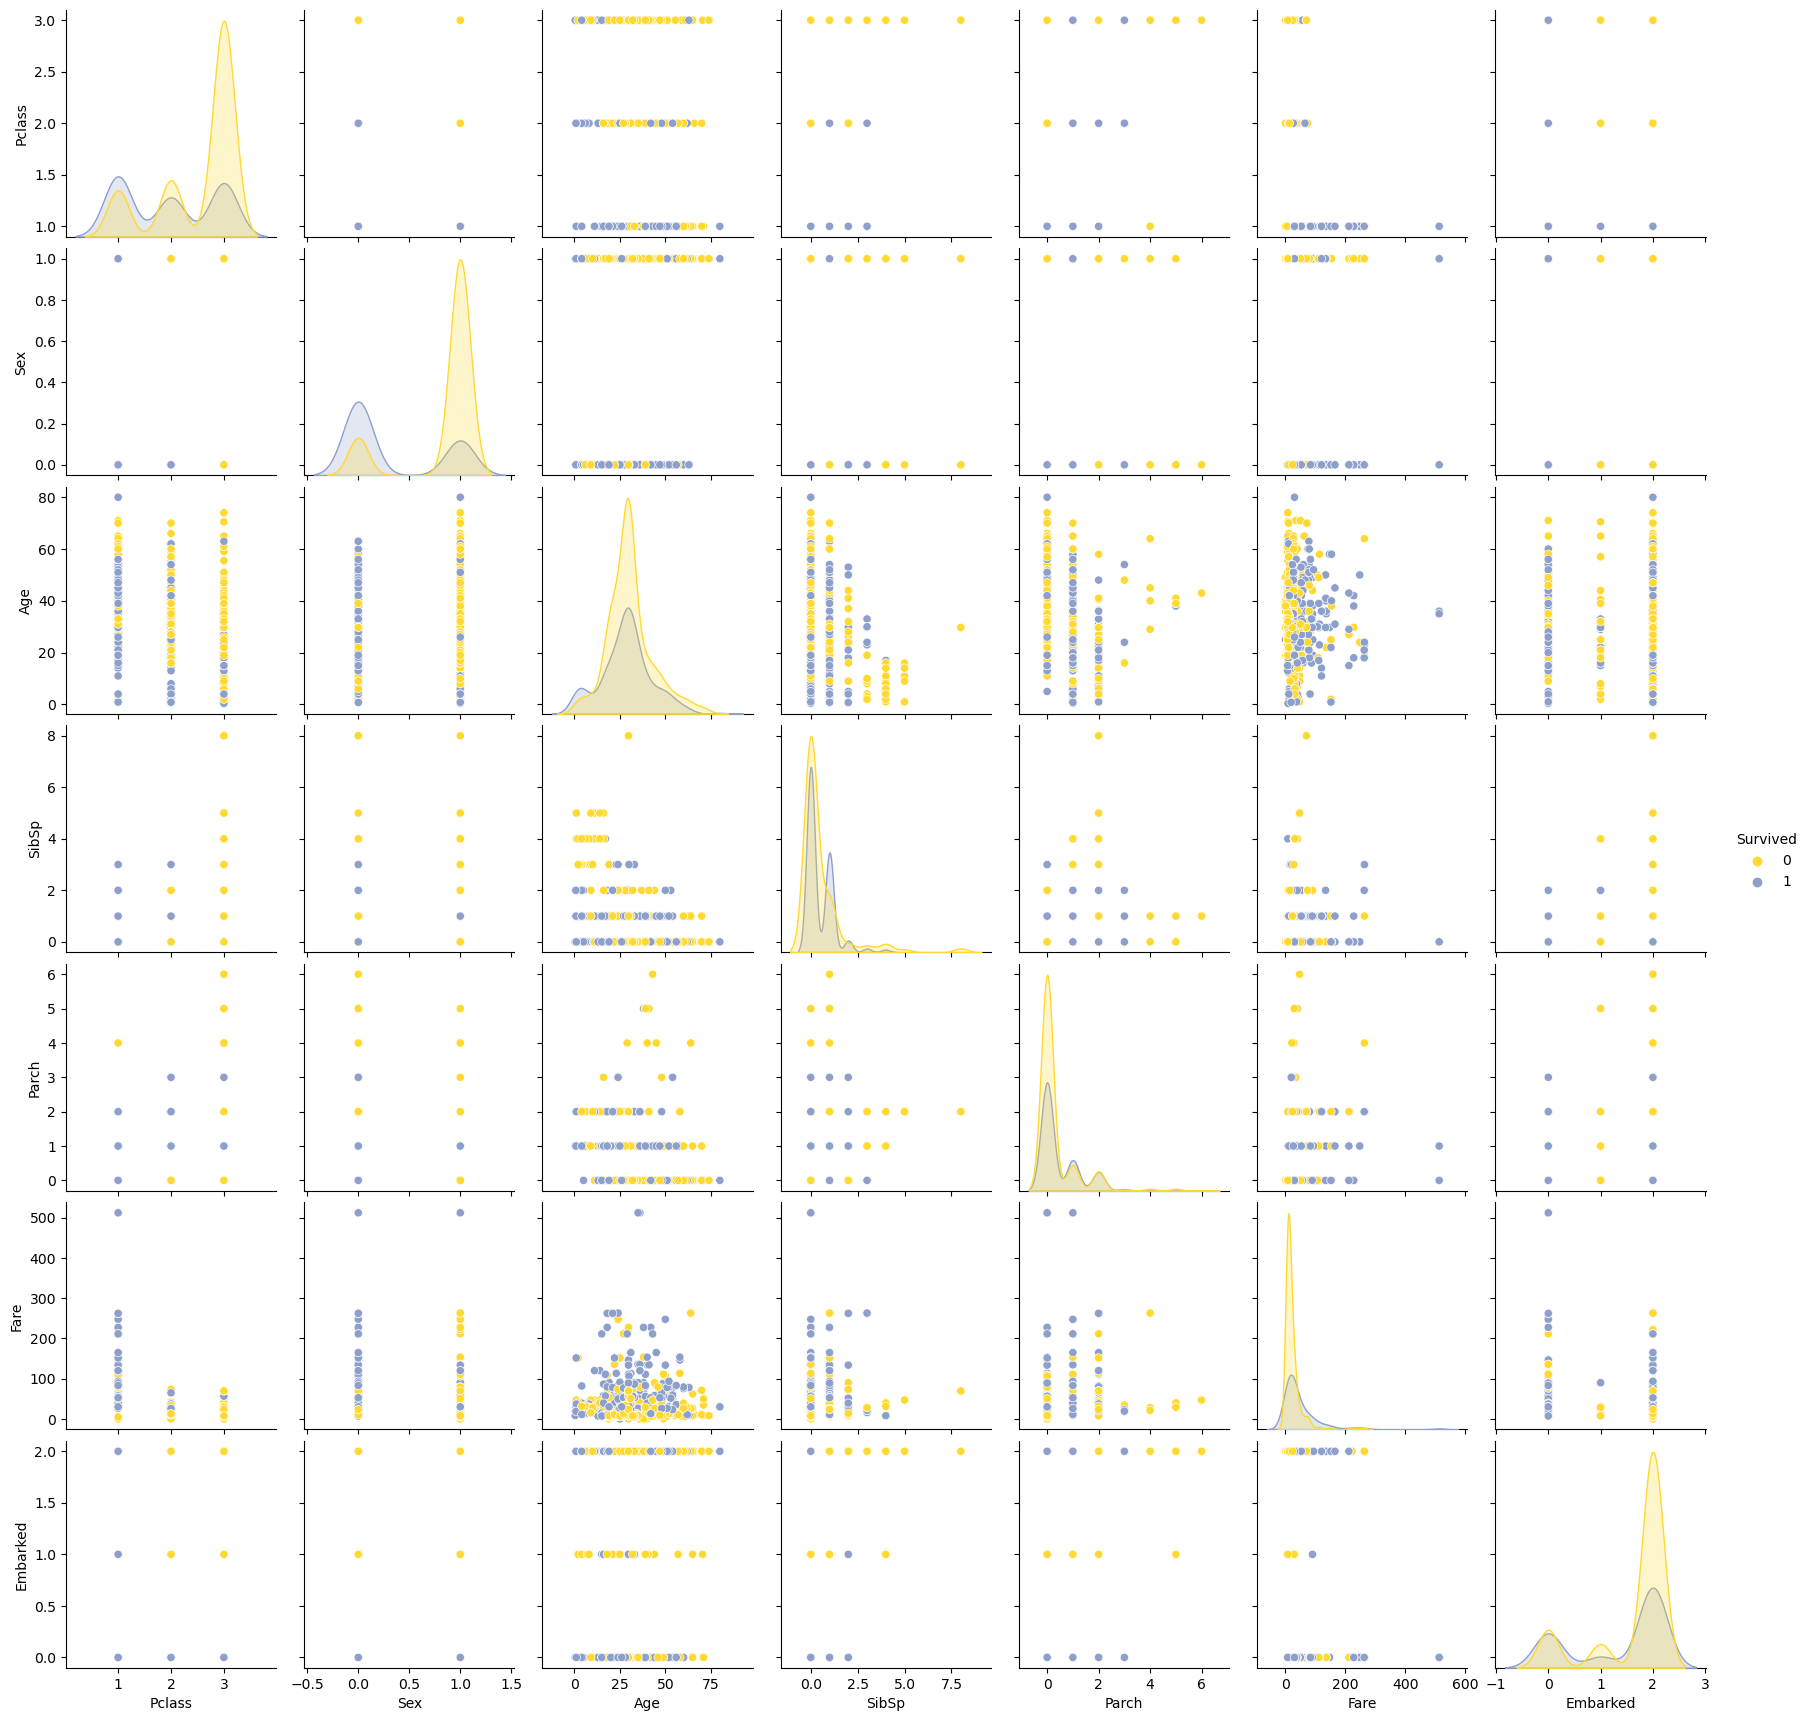

In [21]:
sns.pairplot(df,hue = 'Survived',palette ='Set2_r')

In the first graph we can see the number who have survived in pclass is quite the same in first second and third class. However the maximum people who did not survive is from third class
Many people who have survived are females and few males have also survived. Similarly many males did not survive and few females did not survive
The age shows many people of higher age did not survive. People whoe survived were of middle age or less
siblings and parch data show mix results.
from fare we can see females paying higher and lower fares survived mostly. Men who survived has paid higher fares. but all who paid high fares did not survive either.people of high age paying high fare did survive or atleast one such person did. the average fare for the survival was around $100 most people who embarked from 'E' and paid high fare survived more and then for 'C' and least from 'S'
peopel who embarked from 'S' were maximum and their survival was least compared to the other two ports were the people who boarded and survived were almost half.

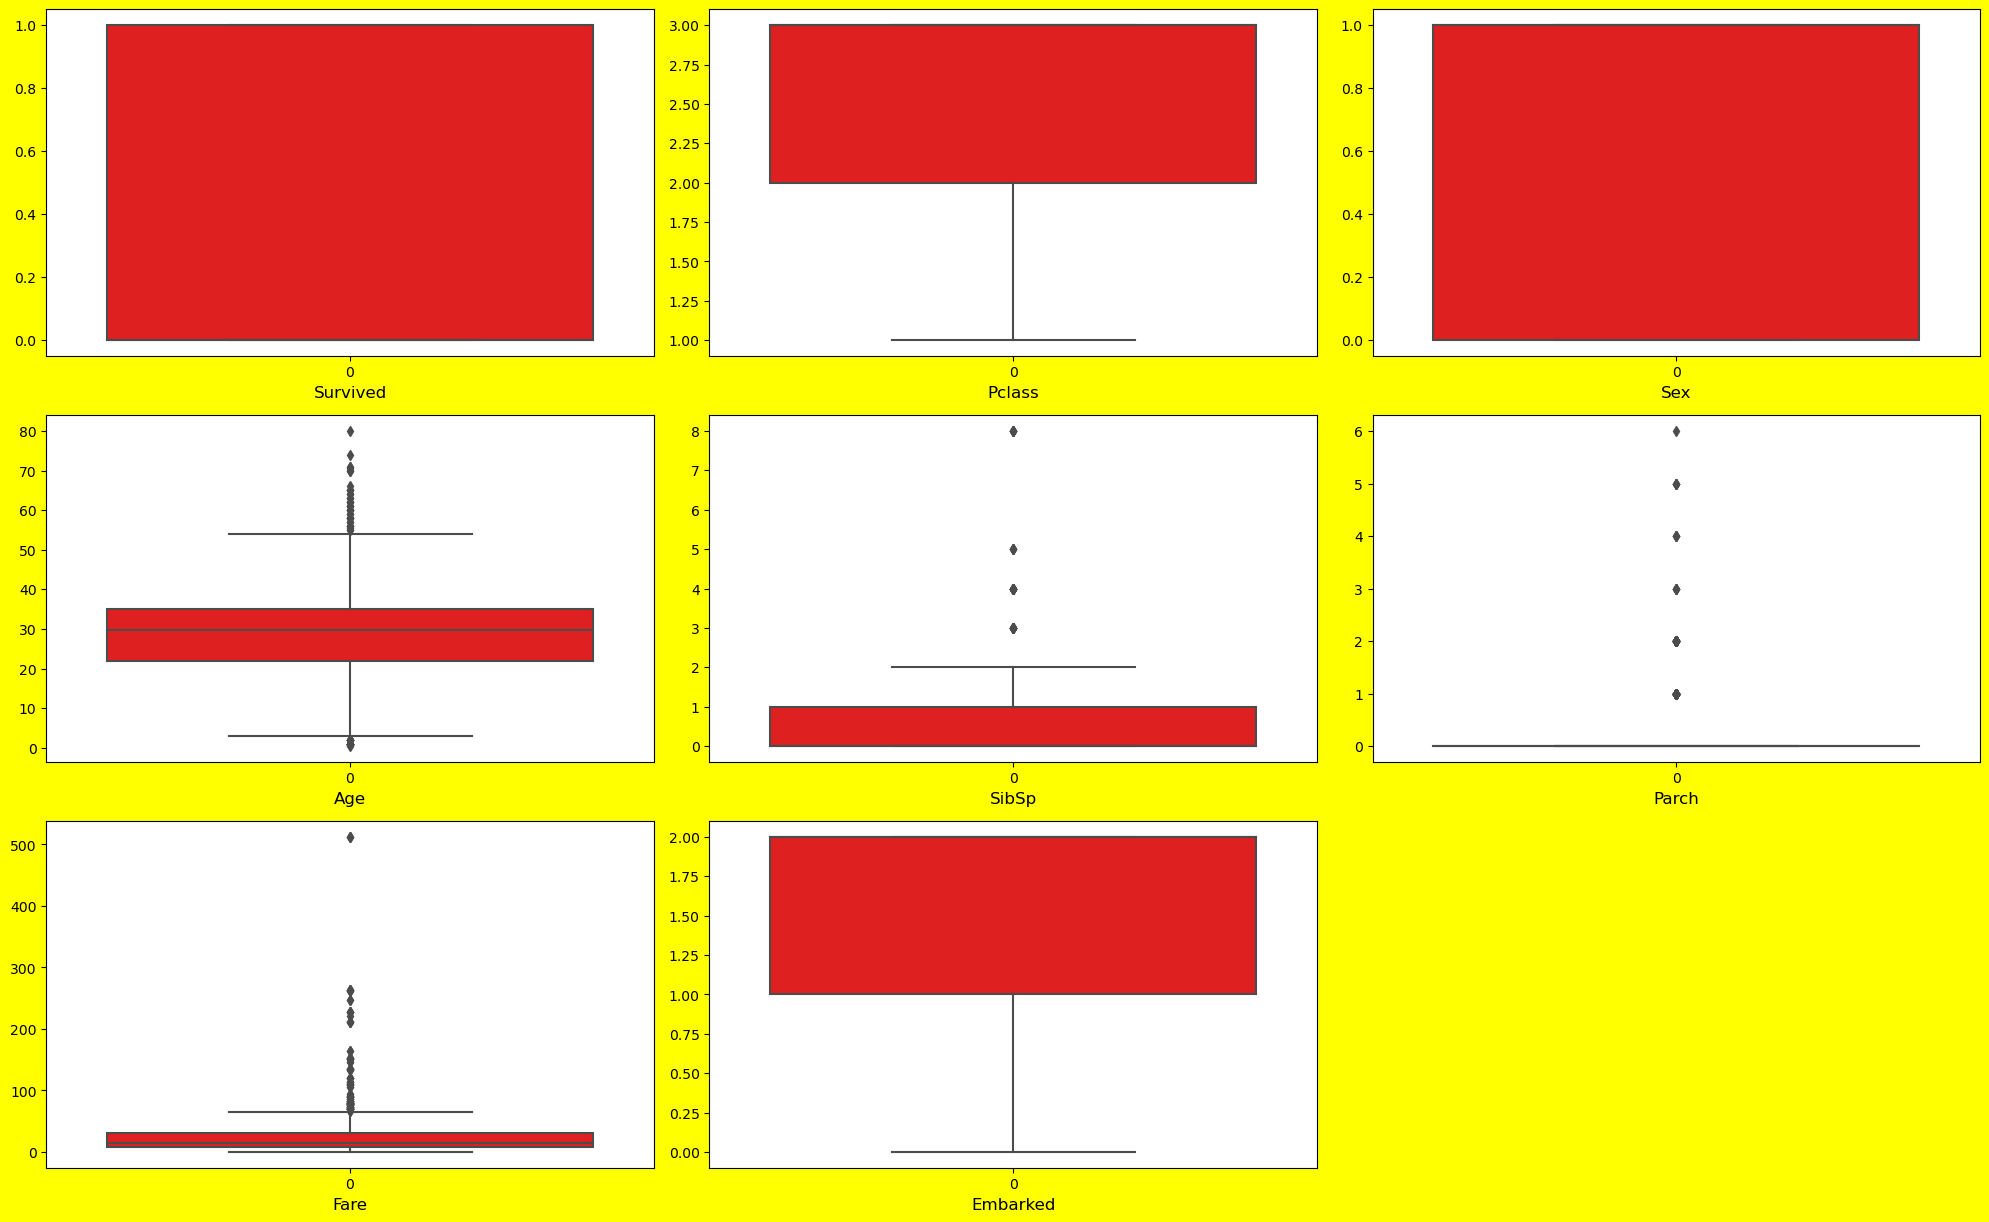

In [22]:
plt.figure(figsize=(20,20),facecolor="yellow")
plotnumber = 1
for column in df:
    if plotnumber <= 11:
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(df[column],color = "r")
        plt.xlabel(column, fontsize = 12)
    plotnumber+=1
plt.tight_layout()

although there are outliers we will drop outliers from only age and leave the rest for the model to learn

In [23]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3 - q1
fix_acid_high = q3 + 1.5*iqr
index = np.where(df['Age'] > fix_acid_high)
df = df.drop(df.index[index])
df.reset_index()

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,1,0,38.000000,1,0,71.2833,0
2,2,1,3,0,26.000000,0,0,7.9250,2
3,3,1,1,0,35.000000,1,0,53.1000,2
4,4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
843,886,0,2,1,27.000000,0,0,13.0000,2
844,887,1,1,0,19.000000,0,0,30.0000,2
845,888,0,3,0,29.699118,1,2,23.4500,2
846,889,1,1,1,26.000000,0,0,30.0000,0


In [24]:
df.skew()

Survived    0.465728
Pclass     -0.721851
Sex        -0.596575
Age        -0.180410
SibSp       3.617049
Parch       2.718272
Fare        4.929152
Embarked   -1.284475
dtype: float64

Although there is some skewness in the columns of Sibsp and parch but they are categorical type data so we will neglect it

In [25]:
corr = df.corr()
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.359226,-0.534603,-0.061142,-0.040785,0.087183,0.258949,-0.172187
Pclass,-0.359226,1.000000,0.146536,-0.273413,0.072330,0.022264,-0.553757,0.152774
Sex,-0.534603,0.146536,1.000000,0.062302,-0.113097,-0.257920,-0.181234,0.116913
Age,-0.061142,-0.273413,0.062302,1.000000,-0.231079,-0.202047,0.076357,-0.011086
SibSp,-0.040785,0.072330,-0.113097,-0.231079,1.000000,0.416506,0.162567,0.068694
Parch,0.087183,0.022264,-0.257920,-0.202047,0.416506,1.000000,0.192417,0.046472
Fare,0.258949,-0.553757,-0.181234,0.076357,0.162567,0.192417,1.000000,-0.224465
Embarked,-0.172187,0.152774,0.116913,-0.011086,0.068694,0.046472,-0.224465,1.000000


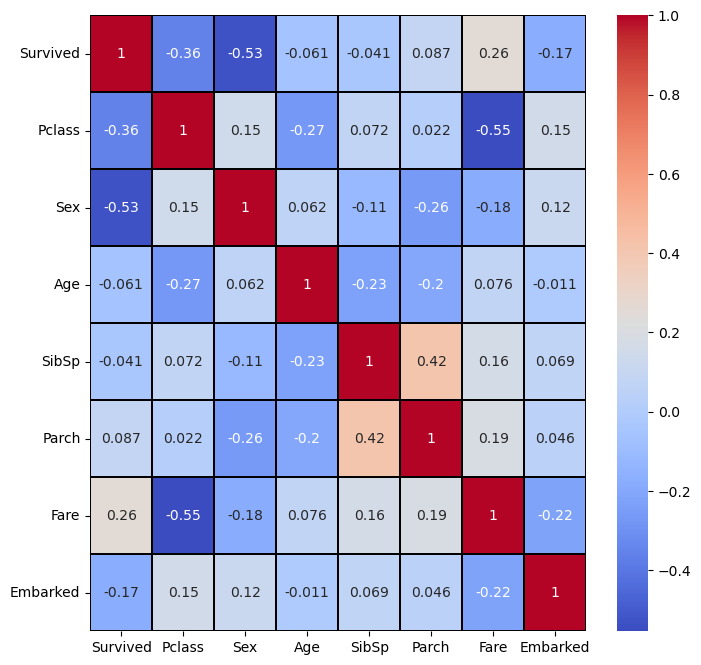

In [26]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(),linewidth = 0.1,fmt = ".2g",annot = True,cmap = "coolwarm",linecolor = 'black')
plt.yticks(rotation = 0)
plt.show()

the data does not show much correlation

In [27]:
x = df.drop('Survived',axis = 1)
y = df['Survived']

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.794891,0.745629,-0.552443,0.407236,-0.478055,-0.489560,0.581799
1,-1.647382,-1.341149,0.899081,0.407236,-0.478055,0.801375,-1.961322
2,0.794891,-1.341149,-0.189562,-0.482806,-0.478055,-0.475951,0.581799
3,-1.647382,-1.341149,0.626920,0.407236,-0.478055,0.434793,0.581799
4,0.794891,0.745629,0.626920,-0.482806,-0.478055,-0.473431,0.581799
...,...,...,...,...,...,...,...
843,-0.426246,0.745629,-0.098842,-0.482806,-0.478055,-0.373638,0.581799
844,-1.647382,-1.341149,-0.824603,-0.482806,-0.478055,-0.030911,0.581799
845,0.794891,-1.341149,0.146023,0.407236,1.993839,-0.162962,0.581799
846,-1.647382,0.745629,-0.189562,-0.482806,-0.478055,-0.030911,-1.961322


In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["features"] = x.columns
vif

,VIF values,features
0,1.617538,Pclass
1,1.117425,Sex
2,1.160173,Age
3,1.284343,SibSp
4,1.332270,Parch
5,1.641548,Fare
6,1.082616,Embarked


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRs = 0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = i)
    RFC = RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred = RFC.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRs = i
        
print("Best accuracy is ",maxAccu , " at random state ", maxRs )

Best accuracy is  0.8764705882352941  at random state  27


In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = maxRs)

In [32]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [33]:
rfc = RandomForestClassifier()
ET = ExtraTreesClassifier()
knn = KNeighborsClassifier()
DT = DecisionTreeClassifier()
lr = LogisticRegression()
svc = SVC()
gb = GradientBoostingClassifier()
ABC = AdaBoostClassifier()
BGC = BaggingClassifier()

In [34]:
models = {'Logistic Regression':lr, 'Random Forest Classifier':rfc ,'Extra Tree Classifier': ET,'K Neighbor Classifier' : knn,'Decision Tree Classifier': DT,'Support Vector Classifier': svc,'Gradient Boosting Classifier':gb,'Ada Boost Classifier':ABC,'Bagging Classifier':BGC}
for name, model in models.items():
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    print("following is the score of ",name)
    print(accuracy_score(y_test,pred))
    print(classification_report(y_test,pred))
    print(confusion_matrix(y_test,pred) )
    score = cross_val_score(model,x,y)
    print(score)
    print(score.mean())
    print("Difference between Accuracy score and cross val score is : ",accuracy_score(y_test,pred) - score.mean())
    print("\n\n")

following is the score of  Logistic Regression
0.8117647058823529
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       121
           1       0.64      0.78      0.70        49

    accuracy                           0.81       170
   macro avg       0.77      0.80      0.78       170
weighted avg       0.83      0.81      0.82       170

[[100  21]
 [ 11  38]]
[0.76470588 0.77647059 0.77647059 0.78106509 0.83431953]
0.7866063348416289
Difference between Accuracy score and cross val score is :  0.025158371040724048



following is the score of  Random Forest Classifier
0.8764705882352941
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       121
           1       0.74      0.88      0.80        49

    accuracy                           0.88       170
   macro avg       0.84      0.88      0.86       170
weighted avg       0.89      0.88      0.88       170

[[106  15]
 [  6  43]]
[0.

the Support vector classifier has shown the best accuracy with a good cross val score as well so we will select SVC for hyperparameter tuning

In [35]:
from sklearn.model_selection import GridSearchCV
params = {
    'C':[0.1,0.3,0.5,0.9,1,3,5,9,10,30,50,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001]
}

In [36]:
grid = GridSearchCV(estimator = svc,param_grid = params)

In [37]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.3, 0.5, 0.9, 1, 3, 5, 9, 10, 30, 50, 100,
                               1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]})

In [38]:
best_parameters = grid.best_params_
print(best_parameters)

{'C': 100, 'gamma': 0.01}


In [39]:
final_model = SVC(C = 100,gamma = 0.01,random_state = maxRs)
final_model.fit(x_train,y_train)
pred = final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

90.0


In [40]:
import pickle
pickle.dump(final_model,open('SVC_model','wb'))